In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [13]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [39]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_6 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [42]:
history=model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5971 - accuracy: 0.7163 - val_loss: 0.5113 - val_accuracy: 0.7944
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7969 - val_loss: 0.4560 - val_accuracy: 0.8025
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8097 - val_loss: 0.4358 - val_accuracy: 0.8106
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8186 - val_loss: 0.4268 - val_accuracy: 0.8175
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8217 - val_loss: 0.4185 - val_accuracy: 0.8194
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8291 - val_loss: 0.4105 - val_accuracy: 0.8200
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8353 - val_loss: 0.4017 - val_accuracy: 0.8263

In [32]:
model.layers[0].get_weights()

[array([[-0.02516883,  0.07752176,  0.14241597,  0.08193211, -0.1472354 ,
         -0.06843936,  0.19712421, -0.28772265, -0.06214397,  0.0567478 ,
          0.11987501],
        [ 1.0087631 , -0.61492693, -0.08871888,  0.404071  , -0.28953803,
          0.29656485, -0.23496993,  0.54915154,  0.06228177, -0.64922345,
          0.2223889 ],
        [-0.10024319, -0.11175361,  0.17059797,  0.10846676,  0.09201207,
          0.05999524, -0.458039  , -0.10176324,  0.10793597,  0.10844751,
         -0.10762104],
        [-0.14579466, -0.13160552, -0.3885256 , -0.12059599,  0.40544954,
         -0.33034185, -0.88416487, -0.22239858, -0.04146976, -0.19214535,
          0.29279864],
        [ 0.98837745,  0.17218554,  0.21514973, -0.59381187,  0.29645923,
         -0.769042  , -0.24654925,  0.02230541,  1.1752665 ,  0.09311688,
          1.070084  ],
        [-0.06861243, -0.05136225,  0.08121793,  0.18723063,  0.1982117 ,
         -0.03228168, -0.36001468,  0.21631663, -0.08811653,  0.0221643

In [33]:
model.layers[1].get_weights()

[array([[ 0.09036421,  0.05512661,  0.1706228 ,  0.75440145, -0.5566755 ,
          0.50528187,  0.82450324,  0.15640396, -0.9038363 , -0.51176846,
         -0.52204555],
        [-0.583521  , -0.6434081 , -0.19498086,  0.07525711,  0.19880058,
          0.44662666, -0.19915694, -0.27020195,  0.46605504, -0.3607247 ,
          0.30701253],
        [ 0.12063035, -0.44793326, -0.26133573, -0.03033439,  0.1272939 ,
          0.60328066, -0.02782449, -0.41251162, -0.05217431,  0.2597103 ,
          0.19353874],
        [ 0.51822484,  0.32336912, -0.13478969,  0.56365883, -0.24841568,
         -0.15528408,  0.5926615 ,  0.43594214,  0.11148134, -0.12508538,
          0.6617504 ],
        [ 0.1600135 , -0.5449878 ,  0.25260842,  0.44331455,  0.4887259 ,
          0.15563734,  0.23446931,  0.3132959 , -0.02090074, -0.299526  ,
          0.09930296],
        [ 0.45325002,  0.61544293,  0.05833867, -0.05370326, -0.24745825,
         -0.11058565, -0.3240683 , -1.377326  ,  0.47688368, -0.5761982

In [34]:
model.layers[2].get_weights()

[array([[ 0.78281623],
        [ 0.846629  ],
        [ 0.77114385],
        [-1.0139356 ],
        [-0.9714686 ],
        [-1.1611485 ],
        [-0.95239264],
        [ 1.6977185 ],
        [-0.45653945],
        [-0.78966534],
        [ 1.0369308 ]], dtype=float32),
 array([-0.1299655], dtype=float32)]

In [35]:
y_log=model.predict(X_test_trf)

In [37]:
y_pred=np.where(y_log>0.5,1,0)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8585

In [44]:
history.history

{'loss': [0.5971322655677795,
  0.47408735752105713,
  0.4358648657798767,
  0.41939976811408997,
  0.4091368019580841,
  0.3993600606918335,
  0.39027515053749084,
  0.3810667097568512,
  0.37176939845085144,
  0.3641626834869385,
  0.35837608575820923,
  0.3530552387237549,
  0.34921348094940186,
  0.3463679552078247,
  0.3441115915775299,
  0.34251877665519714,
  0.34016087651252747,
  0.33931177854537964,
  0.33823540806770325,
  0.33688274025917053,
  0.3361605405807495,
  0.3352413475513458,
  0.3343769907951355,
  0.3340018391609192,
  0.333175927400589,
  0.3327762484550476,
  0.3319341540336609,
  0.3315887153148651,
  0.3309335708618164,
  0.330305814743042,
  0.3295769989490509,
  0.3298029601573944,
  0.3292366862297058,
  0.3288179337978363,
  0.32804057002067566,
  0.3280523717403412,
  0.3278004825115204,
  0.32753926515579224,
  0.3270331621170044,
  0.32700827717781067,
  0.32649341225624084,
  0.3266838490962982,
  0.32607293128967285,
  0.32627999782562256,
  0.32564

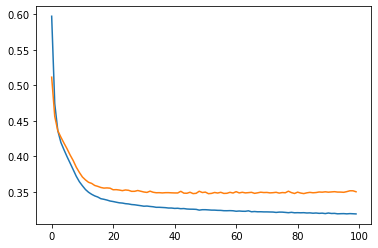

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

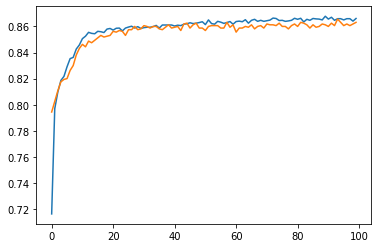

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])